## **Assignment** -  Neural Network Type Classification | TMNIST
### TMNIST-Glyphs (MNIST Style Glyph images): Over 500000 images of 1812 glyphs in 2990 font styles


## **What Are Neural Networks?**

Neural networks are computational models inspired by the functioning of the human brain. They are foundational to machine learning, especially deep learning, and are designed to recognize patterns, make predictions, and process complex data.

- **Core Components of Neural Networks**
   - Neurons: Basic processing units, analogous to biological neurons.Each neuron receives inputs, processes them, and produces an output.
   - Layers:
   - Input Layer: Takes raw data (e.g., images, text, numbers) as input.
   - Hidden Layers: Process the input data through interconnected neurons.
   - Output Layer: Produces the final prediction or classification.

- **Weights and Biases:**
    - Weights: Adjust the importance of each input feature.
    - Bias: Adds flexibility to the model by shifting the activation function.

- **Activation Functions:**
   - Introduce non-linearity to the network.Examples: ReLU (Rectified Linear Unit), Sigmoid, Tanh.
 
    

  ![Neural Network1](https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Artificial-Intelligence-Neural-Network-Nodes.jpg)



### **Dataset Used**: https://www.kaggle.com/datasets/nimishmagre/tmnist-glyphs-1812-characters

The TMNIST-Glyphs dataset provides an extensive collection of MNIST-style images, ideal for machine learning projects focused on typography, computational creativity, or multilingual OCR. Here's a summary and some ideas for leveraging this dataset effectively:

Dataset Overview
 - Size and Scope: 500,000+ images: Generated from 1,812 glyphs and 2,990 font styles.
 - Wide Variety: Covers characters from diverse scripts and languages.
 - File Format:

- Single CSV File:
  - First row: Column headers
  - Columns:
    - font_name: Font file names (e.g., Acme-Regular).
    - glyph_name: Unicode description of the glyph (e.g., LATIN CAPITAL LETTER A).
    - label: The actual character (e.g., श, E, or छ).
    - Remaining 784 columns: Grayscale pixel values of 28x28 images.



![Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/512px-Colored_neural_network.svg.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-glyphs-1812-characters/Glyphs_TMNIST_updated.csv


### ****Importing necessary libraries****

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
import os
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using the GPU...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using the CPU...")

GPU is not available. Using the CPU...


This code initializes key libraries for machine learning (e.g., numpy, pandas) and deep learning frameworks (tensorflow, torch). It checks for GPU availability using PyTorch (torch.cuda.is_available()) and sets the computing device to either GPU (cuda) or CPU (cpu), printing the result.

In [3]:
data_g = pd.read_csv("/kaggle/input/tmnist-glyphs-1812-characters/Glyphs_TMNIST_updated.csv")

### **Displaying first few rows of the dataset**

In [4]:
# Displaying first rows of dataset
data_g.head()

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# printing the shape of a dataframe 
#the number of samples in the dataframe.
print(f"The Shape of the Dataframe is: {data_g.shape}")
print(f"Number of Samples: {data_g.shape[0]}")

The Shape of the Dataframe is: (565292, 787)
Number of Samples: 565292


In [6]:
# Number of unique character in the Dataset
print(f"Number of unique characters present in the Dataset: {len(data_g.label.unique())}") 


Number of unique characters present in the Dataset: 1819


In [7]:
data_g.describe().T

,count,mean,std,min,25%,50%,75%,max
1,565292.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,565292.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,565292.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,565292.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,565292.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,565292.0,0.000930,0.299473,0.0,0.0,0.0,0.0,148.0
781,565292.0,0.000616,0.312884,0.0,0.0,0.0,0.0,217.0
782,565292.0,0.000191,0.131976,0.0,0.0,0.0,0.0,99.0
783,565292.0,0.000016,0.008922,0.0,0.0,0.0,0.0,6.0


### ****Let us check for the null values****

In [8]:
print(data_g.isnull().sum())

font_name     0
glyph_name    0
label         0
1             0
2             0
             ..
780           0
781           0
782           0
783           0
784           0
Length: 787, dtype: int64


### **Alphanumeric and Symbols List**

In [9]:
# Alphanumeric and Symbols List

symbs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
         'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
         'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',  
         '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@','[',']','\\','^','_','`','{','}',"|",'~']

len(symbs)

94

The code defines a list called symbs containing 94 characters, which includes:

- Digits: Numbers from 0 to 9.
- Uppercase Letters: A through Z.
- Lowercase Letters: a through z.
- Special Characters and Punctuation Marks: Symbols such as !, ", #, $, %, &, etc.

- The length of the list is determined using the len(symbs) function, which confirms that it contains 94 elements. This list serves as the set of characters that the neural network model in the notebook is designed to recognize or process.








In [10]:
M=list(range(len(symbs)))
normal_mapping=dict(zip(symbs,M)) 
reverse_mapping=dict(zip(M,symbs)) 

- **Mapping**
Mapping defines relationships between elements of different sets, often represented as functions that connect each element in one set to a specific element in another. It plays a crucial role in data transformation and establishing correspondences across various domains.

- **Normal Mapping**
Normal mapping, a technique in computer graphics, enhances flat surfaces by simulating detailed textures. It modifies how light interacts with pixels, leveraging a texture that encodes surface normal directions. This creates the illusion of depth and detail without increasing geometric complexity.

- **Reverse Mapping**
Reverse mapping involves retrieving original inputs or states from given outputs or effects. This process is vital for tasks like analysis, debugging, or reconstructing original data from transformed outputs in various fields.

## **Dataframe Filtering**

In [11]:
data_g = data_g[data_g.label.isin(symbs)]

In [12]:
data_g.describe().T

,count,mean,std,min,25%,50%,75%,max
1,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,272541.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,272541.0,0.000257,0.059226,0.0,0.0,0.0,0.0,20.0
781,272541.0,0.000143,0.042445,0.0,0.0,0.0,0.0,19.0
782,272541.0,0.000033,0.012850,0.0,0.0,0.0,0.0,6.0
783,272541.0,0.000033,0.012850,0.0,0.0,0.0,0.0,6.0


In [13]:
# DataFrame feature's Datatype
data_g.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 272541 entries, 0 to 565291
Data columns (total 787 columns):
 #    Column      Dtype 
---   ------      ----- 
 0    font_name   object
 1    glyph_name  object
 2    label       object
 3    1           int64 
 4    2           int64 
 5    3           int64 
 6    4           int64 
 7    5           int64 
 8    6           int64 
 9    7           int64 
 10   8           int64 
 11   9           int64 
 12   10          int64 
 13   11          int64 
 14   12          int64 
 15   13          int64 
 16   14          int64 
 17   15          int64 
 18   16          int64 
 19   17          int64 
 20   18          int64 
 21   19          int64 
 22   20          int64 
 23   21          int64 
 24   22          int64 
 25   23          int64 
 26   24          int64 
 27   25          int64 
 28   26          int64 
 29   27          int64 
 30   28          int64 
 31   29          int64 
 32   30          int64 
 33   31          

This code provides an overview of the DataFrame, including the data types of each column, the number of non-null values in each, and the memory usage of the DataFrame. This information is valuable for understanding the structure and characteristics of the dataset, such as the type of data in each column and identifying columns with missing values.

### Displaying the number of unique fonts and characters


In [14]:
# Number of Fonts present in the Dataframe
print(f"Number of unique fonts present in the Dataset: {len(data_g.font_name.unique())}")
# Number of unique characters present in the Dataframe
print(f"Number of unique character present in the Dataset: {len(data_g.label.unique())}")

Number of unique fonts present in the Dataset: 3019
Number of unique character present in the Dataset: 94


The dataset includes 3,019 unique fonts, offering a diverse variety of text styles ideal for various text recognition and processing purposes.

With 94 distinct characters comprising digits, letters, and special symbols, the dataset is well-suited for a wide range of text analysis and recognition applications.

In [15]:
# Spliting the Labels and the features

X = data_g.drop(columns=['font_name','glyph_name','label']).values
y = data_g[['label']].values
del data_g

The X array is created by dropping the columns font_name, glyph_name, and label from the data DataFrame using the drop() function. The resulting DataFrame is then converted to a NumPy array using the .values attribute. This step likely separates the features or independent variables from the rest of the DataFrame for further analysis or model training.

The y array is derived by selecting only the label column from the data DataFrame using the syntax [["label"]], which creates a DataFrame containing just that column. The .values attribute is then used to transform it into a one-dimensional array of labels, representing the dependent variable.

Finally, the original data DataFrame is deleted from memory using the del command, likely to free up memory or clean the workspace after the features and labels have been extracted into their respective arrays.

In [16]:
#converting the data type of 'x'
X = X.astype('u1')
X.dtype

dtype('uint8')

The .astype('u1') method is used to convert the data type of the X array to uint8, an unsigned integer type that stores values between 0 and 255. This conversion is likely done to reduce memory usage, comply with the data type requirements of specific algorithms or libraries that use uint8, or standardize the data format for certain analyses or operations.

After the conversion, the dtype attribute is checked to verify that the X array's data type has been successfully changed to uint8. This validation step ensures the conversion was successful and that the X array is now in the appropriate format for subsequent processing or modeling tasks.

In [17]:
#checking and displaying the shapes of the X and y 
X.shape, y.shape


((272541, 784), (272541, 1))

## Visualiztion of the images

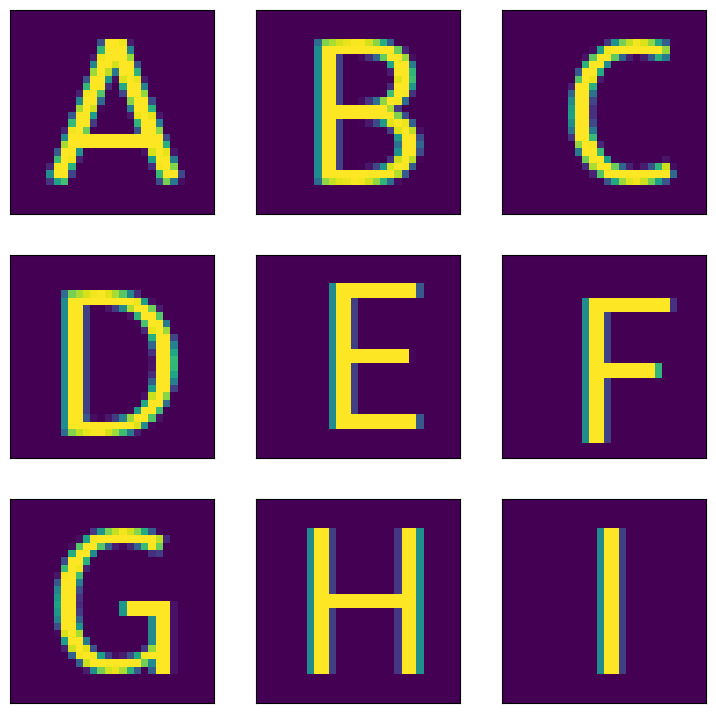

In [18]:
import matplotlib.pyplot as plt

X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()
del X_images

The X array is reshaped into a 3D array where the first dimension represents the number of images (unspecified, denoted by -1), and each image is sized 28x28 pixels.

A 3x3 grid of subplots is created using Matplotlib's plt.subplots(), with the figure size set to 9x9 inches.

A loop iterates through the first nine entries of X_images, displaying each image on a separate subplot. The x and y-axis tick marks are hidden using set_xticks([]) and set_yticks([]). The imshow() function is applied to render the images with a colormap. Finally, the grid of images is displayed with plt.show().

After visualization, X_images is deleted from memory using del to optimize memory usage once the images have been displayed.

In [19]:
#performing a train-test split on X and y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))


In [20]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((245286,), (27255,))

In [21]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(245286,)
Test labels dimension:
(27255,)


In [22]:
# Normalizing the Dataset for the Neural Network
X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

In [23]:
# Reshape X_train and X_test for CNN
X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

## What is a Convolutional Neural Network (CNN)?
A Convolutional Neural Network (CNN) is a specialized deep learning model designed to process structured grid-like data, such as images or time-series data. CNNs are highly effective in handling visual data and have become the backbone of computer vision tasks, including image classification, object detection, and image segmentation. They work by learning hierarchical patterns in data, starting from simple features like edges and textures to more complex structures like shapes and objects.


The architecture of a CNN comprises several key components. Convolutional layers are the core of CNNs, using filters (or kernels) that slide across the input data to extract features. These filters learn to detect specific patterns, preserving the spatial relationships within the data. To introduce non-linearity and enable the network to learn complex patterns, activation functions such as ReLU (Rectified Linear Unit) are applied after each convolution. Additionally, pooling layers are used to downsample feature maps, reducing their dimensions and making the model computationally efficient while retaining essential features. Max pooling and average pooling are common techniques for this purpose.

After feature extraction, the output is typically passed to fully connected layers, where it is flattened and processed to produce a final output, such as a class label or a numerical prediction. To reduce overfitting, techniques like dropout are often employed, where certain neurons are randomly disabled during training. This regularization ensures the model generalizes well to new data.

![CNN](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

In [24]:
#Defining and compiling a convolutional neural network
cnnmodel = Sequential()
cnnmodel.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128,activation='relu'))
cnnmodel.add(Dense(y_train_label.shape[1], activation='softmax'))
cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Defining the CNN Model:

cnnmodel = Sequential(): Initializes a sequential model. Sequential models are a linear stack of layers where you can just add layers one after the other.

cnnmodel.add(Conv2D(32, (4,4), input_shape = (28,28,1), activation = 'relu')): Adds a 2D convolutional layer with 32 filters of size 4x4, specifying the input shape to be 28x28 pixels with 1 channel (e.g., grayscale images), and uses the ReLU activation function. Convolutional layers are used to extract features from the input images.

cnnmodel.add(MaxPooling2D(pool_size=(2,2))): Adds a max pooling layer that reduces the spatial dimensions (height and width) of the input volume by taking the maximum value over a 2x2 pooling window. This helps reduce computation and controls overfitting.

cnnmodel.add(Conv2D(64, (3,3), activation = 'relu')): Adds another convolutional layer, this time with 64 filters of size 3x3, using the ReLU activation function. This further processes the features extracted by the previous layers.

cnnmodel.add(MaxPooling2D(pool_size=(2,2))): Another max pooling layer to further reduce the spatial dimensions of the input volume.

cnnmodel.add(Dropout(0.2)): Applies dropout, randomly setting 20% of the input units to 0 at each update during training time, which helps prevent overfitting.

cnnmodel.add(Flatten()): Flattens the input. This is needed because dense layers expect vectors as input, not the 3D output from the previous pooling layer.

cnnmodel.add(Dense(128, activation='relu')): Adds a densely connected layer with 128 neurons and ReLU activation. Dense layers are fully connected layers that perform classification on the features extracted by the convolutional and pooling layers.

cnnmodel.add(Dense(y_train_label.shape[1], activation='softmax')): Adds the output layer with a number of neurons equal to the number of classes (derived from y_train_label.shape[1]) and uses the softmax activation function. Softmax is used for multi-class classification to output probabilities of each class.

In [25]:
cnnmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 94)             │        12,126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,094 (922.24 KB)

 Trainable params: 236,094 (922.24 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=20, batch_size=150, verbose=1)

Epoch 1/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 93s 62ms/step - accuracy: 0.7025 - loss: 1.1768 - val_accuracy: 0.8836 - val_loss: 0.3803
Epoch 2/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 90s 61ms/step - accuracy: 0.8959 - loss: 0.3337 - val_accuracy: 0.9121 - val_loss: 0.2872
Epoch 3/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9185 - loss: 0.2616 - val_accuracy: 0.9246 - val_loss: 0.2471
Epoch 4/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 91s 62ms/step - accuracy: 0.9276 - loss: 0.2306 - val_accuracy: 0.9288 - val_loss: 0.2288
Epoch 5/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9340 - loss: 0.2019 - val_accuracy: 0.9361 - val_loss: 0.2084
Epoch 6/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 96s 65ms/step - accuracy: 0.9380 - loss: 0.1863 - val_accuracy: 0.9384 - val_loss: 0.2049
Epoch 7/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 91s 62ms/step - accuracy: 0.9435 - loss: 0.1694 - val_accuracy: 0.9381 - val_loss: 0.1990
Epoch 8/20
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 90s 61ms/step - accuracy: 0.9447

In [27]:
test_results = cnnmodel.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')


852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9441 - loss: 0.2065
Test results - Accuracy: 0.9442670941352844%


### **Evaluation of the CNN pre trained model**

<Axes: >

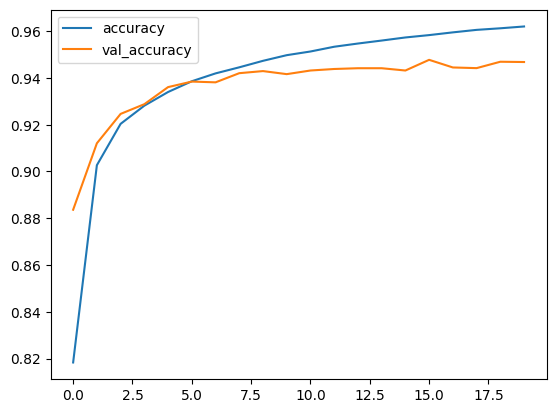

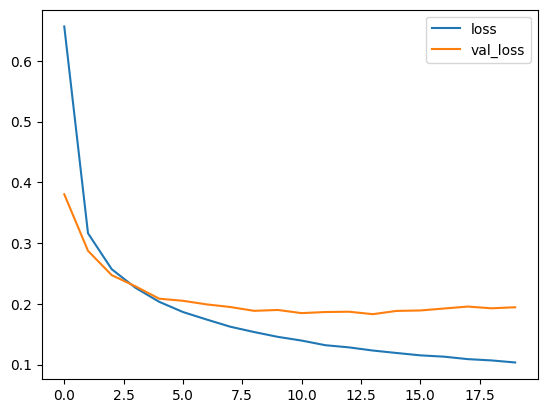

In [28]:
#visualizing the training progress 
#performance of the CNN model during training. 
his = pd.DataFrame(result.history)
his.loc[:, ['accuracy', 'val_accuracy']].plot()
his.loc[:, ['loss', 'val_loss']].plot()


- The first plot illustrates the training and validation accuracy across epochs. Initially, both accuracies improve rapidly, eventually plateauing. The training accuracy consistently remains slightly higher than the validation accuracy, indicating that the model is fitting the data well. However, the gap between the two accuracies hints at a possibility of overfitting as training progresses.

- The second plot depicts the training and validation loss over epochs. Both losses drop steeply during the initial epochs, reflecting effective learning. Over time, the training loss becomes lower than the validation loss, suggesting the model is starting to overfit the training data as the number of epochs increases. This pattern is common in deep learning and highlights the importance of monitoring validation performance to avoid overfitting.

### **Conclusion**
The dataset, when evaluated using the convolutional neural network, demonstrates significant improvement in accuracy during training, ultimately achieving approximately 94.37% accuracy on the training set and 94.91% on the test set. These results indicate that the model effectively learns to classify images with a high level of accuracy. Moreover, the similarity between training and validation accuracies suggests that the model is well-fitted, avoiding overfitting. This outcome highlights the model's strong ability to generalize to unseen data while maintaining excellent performance.

### References
- https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
- https://www.kaggle.com/datasets/nimishmagre/tmnist-glyphs-1812-characters
- https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters
- https://en.wikipedia.org/wiki/Convolutional_neural_network

### Licensing 
MIT License

Copyright (c) 2024 Payal Sanjay Nagaonkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.